In [464]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder ,FunctionTransformer ,MinMaxScaler , StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [465]:
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare','Embarked'])
# df['Age'] = df['Age'].fillna(df['Age'].mean())
df

,Survived,Age,Fare,Embarked
0,0,22.0,7.2500,S
1,1,38.0,71.2833,C
2,1,26.0,7.9250,S
3,1,35.0,53.1000,S
4,0,35.0,8.0500,S
...,...,...,...,...
886,0,27.0,13.0000,S
887,1,19.0,30.0000,S
888,0,NaN,23.4500,S
889,1,26.0,30.0000,C


In [466]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.3,random_state=42)
x_train

,Age,Fare,Embarked
445,4.0,81.8583,S
650,NaN,7.8958,S
172,1.0,11.1333,S
450,36.0,27.7500,S
314,43.0,26.2500,S
...,...,...,...
106,21.0,7.6500,S
270,NaN,31.0000,S
860,41.0,14.1083,S
435,14.0,120.0000,S


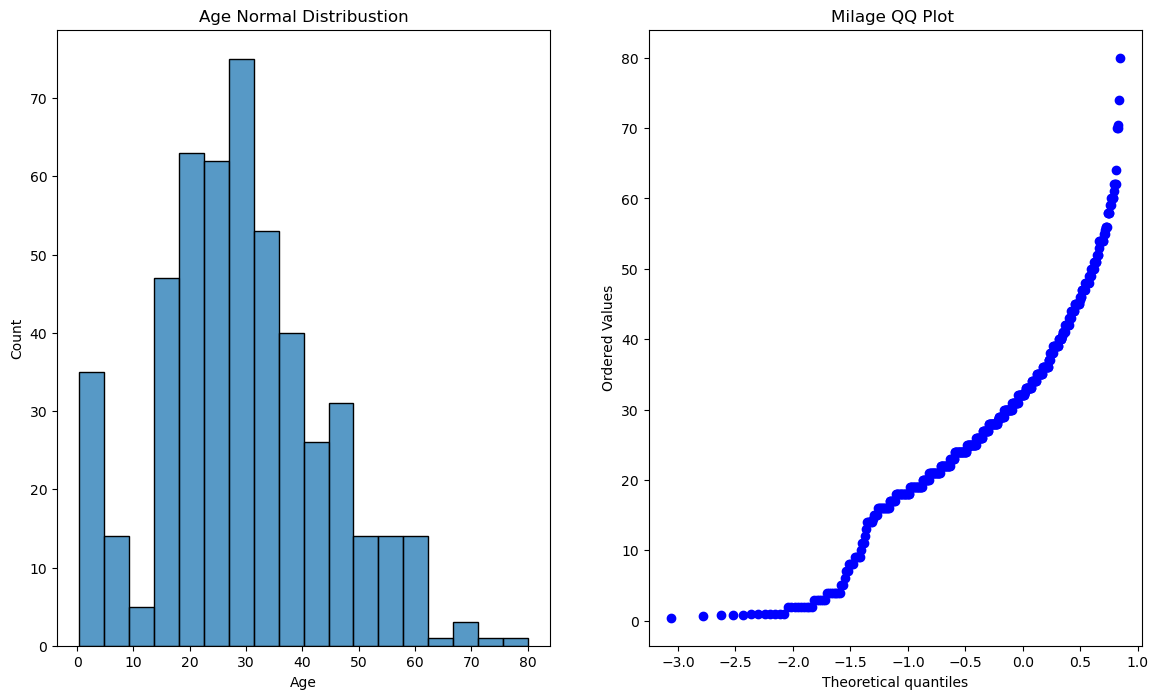

In [467]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.histplot(x_train['Age'])
plt.title('Age Normal Distribustion')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Milage QQ Plot ')

plt.show()

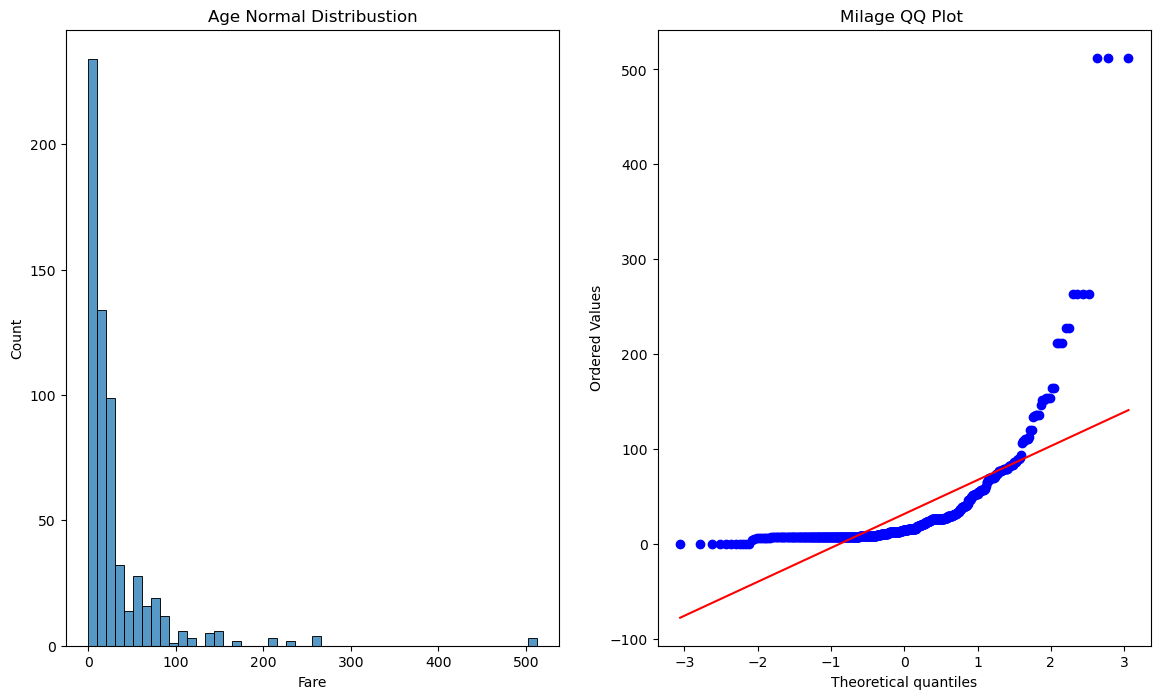

In [468]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.histplot(x_train['Fare'])
plt.title('Age Normal Distribustion')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Milage QQ Plot ')

plt.show()

In [469]:
# m1 = LogisticRegression()
# m2 = DecisionTreeClassifier()

# m1.fit(x_train[['Age','Fare']],y_train)
# m2.fit(x_train[['Age','Fare']],y_train)

# y_pred = m1.predict(x_test[['Age','Fare']])
# y_pred1 = m2.predict(x_test[['Age','Fare']])

# print("Accuracy LR",accuracy_score(y_test,y_pred))
# print("Accuracy DT",accuracy_score(y_test,y_pred1))


In [470]:
# #Data Cleaning 
# pip1 = ColumnTransformer(
#     [('impute',SimpleImputer(strategy='mean'),[0]),
#      ('impute_embark',SimpleImputer(strategy='most_frequent'),[2])]
#     , remainder='passthrough')

In [471]:
# #Transformer Age and fare is Left dis then it convert into normal dist
# pip2 = ColumnTransformer([('Trans_age_fare',FunctionTransformer(np.log1p,validate=True),[0,1])],
#                          remainder='passthrough') 

In [472]:
# # In This pipeline im using Encoding 
# pip3 = ColumnTransformer([
#     ('Encode_Embark_ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[2])],
#     remainder='passthrough')

In [473]:
# pip4 = ColumnTransformer(
#     [('scale_minmx',MinMaxScaler(),slice(0,1))])

In [474]:
m1 = LogisticRegression()
# m1 = DecisionTreeClassifier()

In [475]:
# pipe  = Pipeline([
#     ('cleaning',pip1),
#     ('Transformation',pip2),
#     ('Encoding',pip3),
#     ('Scaling',pip4),
#     ('Model',m1)    
# ])

# pipe.named_steps

In [476]:
Cat_data = Pipeline(
    steps=[
        ('impute_embark',SimpleImputer(strategy='most_frequent')),
        ('Encode_Embark_ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
        ])

In [477]:
Num_data = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('Trans_age_fare',FunctionTransformer(np.sqrt,validate=False)),
    ('scale_minmx',StandardScaler())
])


In [478]:
preprocessing = ColumnTransformer([
    ('Cat_data',Cat_data, [2]),
    ('Num_data',Num_data, [0,1])
])

In [479]:
model = Pipeline([
    ('preprocess',preprocessing),
    ('model',m1)
])
model.named_steps

{'preprocess': ColumnTransformer(transformers=[('Cat_data',
                                  Pipeline(steps=[('impute_embark',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('Encode_Embark_ohe',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore',
                                                                 sparse_output=False))]),
                                  [2]),
                                 ('Num_data',
                                  Pipeline(steps=[('impute', SimpleImputer()),
                                                  ('Trans_age_fare',
                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                  ('scale_minmx',
                                                   Sta

In [480]:
model.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Cat_data', ...), ('Num_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [481]:
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.667910447761194


In [482]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])